In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

# Read data file and some glimpse on the raw data

In [5]:
filename = "FC_0.csv"
df = pd.read_csv(filename, header=0, sep=',', dtype=np.float)
print('Are ther any Nan value?:\n', np.isnan(df).any())
# ignore rows which contain zero
ignore_zero = df[(df['Strain']==0) | (df['Stress']==0) | (df['Temp']==0) | (df['Rate']==0)]
df=pd.concat([df, ignore_zero, ignore_zero]).drop_duplicates(keep=False)
df.head()

Are ther any Nan value?:
 Strain    False
Stress    False
Temp      False
Rate      False
dtype: bool


,Strain,Stress,Temp,Rate
13,5.140290e-07,51.967081,293.0,0.0001
14,6.331630e-06,108.002443,293.0,0.0001
15,7.546450e-06,113.458839,293.0,0.0001
16,4.301020e-06,118.983083,293.0,0.0001
17,8.920770e-06,124.495640,293.0,0.0001


The data is a multivariate time series and the best way to understand a time series is to create line plots. We can start off by creating a separate line plot for each of the 4 variables. The complete example is listed below.

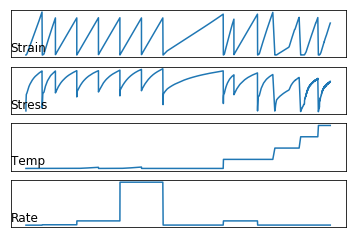

In [6]:
# line plot for each variable
plt.figure()
for i in range(len(df.columns)):
	# create subplot
	plt.subplot(len(df.columns), 1, i+1)
	# get variable name
	name = df.columns[i]
	# plot data
	plt.plot(df[name])
	# set title
	plt.title(name, y=0, loc='left')
	# turn off ticks to remove clutter
	plt.yticks([])
	plt.xticks([])
plt.show()

The data mentioned above is the raw data which includes all the flow curves in one data. 
First of all, it should be splitted into on dataframe per one flow curve for the later analysis.

## Splitting flow curves

In [7]:
# Flow curve in normal environment; room temperature/quasi-static loading
df_QSRT = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_QSRT.head()

,Strain,Stress,Temp,Rate
12113,0.000001,122.9355,293.0,0.000278
12115,0.000007,132.9130,293.0,0.000278
12116,0.000009,138.4701,293.0,0.000278
12117,0.000010,143.5298,293.0,0.000278
12118,0.000010,149.0209,293.0,0.000278


(100, 550)

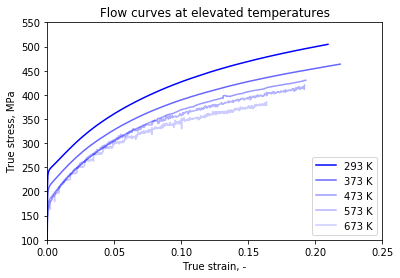

In [8]:
# Flow curve in different temperatures
df_QSRT = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_373K = df[(df['Temp']==373.0) & (df['Rate']==0.000278)]
df_473K = df[(df['Temp']==473.0) & (df['Rate']==0.000278)]
df_573K = df[(df['Temp']==573.0) & (df['Rate']==0.000278)]
df_673K = df[(df['Temp']==673.0) & (df['Rate']==0.000278)]

plt.plot(df_QSRT['Strain'], df_QSRT['Stress'], label='293 K', color='blue', alpha=1.0)
plt.plot(df_373K['Strain'], df_373K['Stress'], label='373 K', color='blue', alpha=0.6)
plt.plot(df_473K['Strain'], df_473K['Stress'], label='473 K', color='blue', alpha=0.4)
plt.plot(df_573K['Strain'], df_573K['Stress'], label='573 K', color='blue', alpha=0.3)
plt.plot(df_673K['Strain'], df_673K['Stress'], label='673 K', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at elevated temperatures')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

(100, 550)

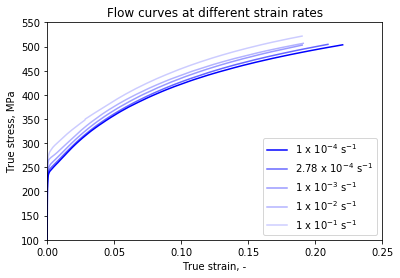

In [9]:
# Flow curves in different strain rates, adiabatic condition
df_e4 = df[df['Rate']==0.0001]
df_QSRT = df[(df['Rate']==0.000278) & (df['Temp']==293.0)]
df_e3 = df[(df['Rate']==0.001) & (df['Temp']!=293.0)]
df_e2 = df[(df['Rate']==0.01) & (df['Temp']!=293.0) & (df['Temp']!=373.001) & (df['Temp']!=373.0)]
df_e1 = df[(df['Rate']==0.1) & (df['Temp']!=293.0)]

plt.plot(df_e4['Strain'], df_e4['Stress'], label='1 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=1.0)
plt.plot(df_QSRT['Strain'], df_QSRT['Stress'], label='2.78 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=0.6)
plt.plot(df_e3['Strain'], df_e3['Stress'], label='1 x 10$^{-3}$ s$^{-1}$', color='blue', alpha=0.4)
plt.plot(df_e2['Strain'], df_e2['Stress'], label='1 x 10$^{-2}$ s$^{-1}$', color='blue', alpha=0.3)
plt.plot(df_e1['Strain'], df_e1['Stress'], label='1 x 10$^{-1}$ s$^{-1}$', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at different strain rates')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

Please be noted that the flow curves at different strain rates above are in adiabatic condition. There is no control in temperature during the tests. Therefore, the temperature of the samples rose higher for the high strain rate tests especially at 1x10$^{-2}$ and 1x10$^{-1}$ s$^{-1}$ strain rates. This information cannot be taken into account for further material's behavior analysis. Thus, they should be corrected into isothermal flow curves which are shown below.

(290, 310)

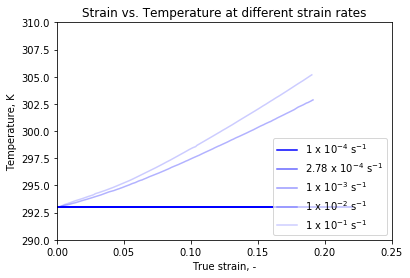

In [10]:
# plot strain vs. temperature for each high speed test result
plt.plot(df_e4['Strain'], df_e4['Temp'], label='1 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=1.0)
plt.plot(df_QSRT['Strain'], df_QSRT['Temp'], label='2.78 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=0.6)
plt.plot(df_e3['Strain'], df_e3['Temp'], label='1 x 10$^{-3}$ s$^{-1}$', color='blue', alpha=0.4)
plt.plot(df_e2['Strain'], df_e2['Temp'], label='1 x 10$^{-2}$ s$^{-1}$', color='blue', alpha=0.3)
plt.plot(df_e1['Strain'], df_e1['Temp'], label='1 x 10$^{-1}$ s$^{-1}$', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('Temperature, K')    #Name y label
plt.title('Strain vs. Temperature at different strain rates')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=290, ymax=310) # y-axis range

(200, 550)

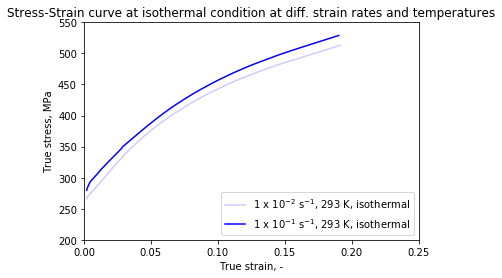

In [11]:
# Flow curve in isothermal conditions
df_e3_iso = df[(df['Rate']==0.001) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e2_iso = df[(df['Rate']==0.01) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e1_iso = df[(df['Rate']==0.1) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e2_373K_iso = df[(df['Rate']==0.01) & (df['Temp']==373.0)]
# Flow curve in isothermal conditions
df_e2_373K = df[(df['Rate']==0.01) & (df['Temp']==373.001)]


plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='blue', alpha=0.2)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='blue', alpha=1.0)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Stress-Strain curve at isothermal condition at diff. strain rates and temperatures')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=200, ymax=550) # y-axis range

In [12]:
# Put all flow curves as list
flows = {'QSRT': df_QSRT,
         '373K': df_373K, 
         '473K': df_473K,
         '573K': df_573K,
         '673K': df_673K,
         'e4': df_e4,
         'e3': df_e3,
         'e2': df_e2,
         'e1': df_e1,
         'e3_iso': df_e3_iso,
         'e2_iso': df_e2_iso,
         'e1_iso': df_e1_iso,
         'e2_373K': df_e2_373K,
         'e2_373K_iso': df_e2_373K_iso}

(100, 550)

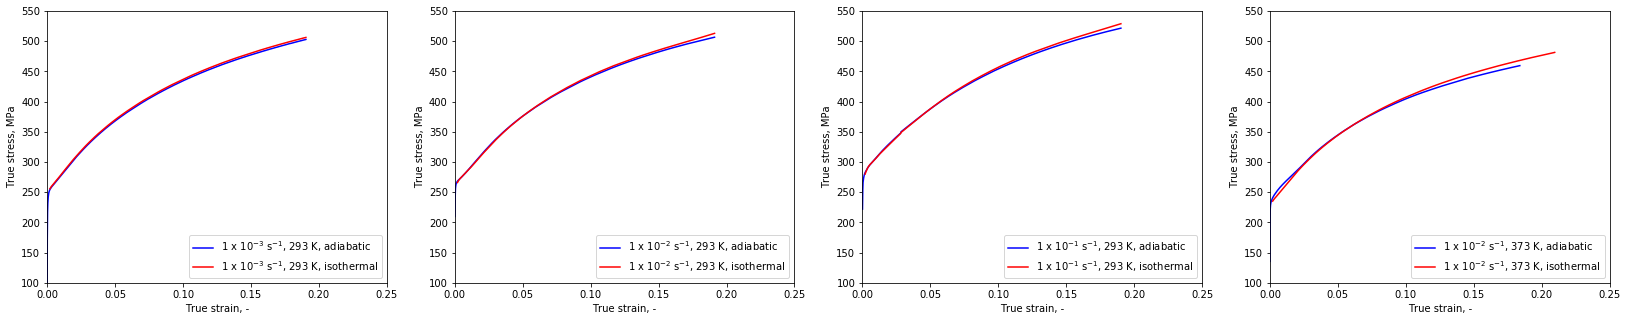

In [13]:
# compare isothermal flow curves and adiabatic flow curves
plt.figure(figsize=(28,5))
plt.subplot(1,4,1)
plt.plot(df_e3['Strain'], df_e3['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

plt.subplot(1,4,2)
plt.plot(df_e2['Strain'], df_e2['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

plt.subplot(1,4,3)
plt.plot(df_e1['Strain'], df_e1['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

plt.subplot(1,4,4)
plt.plot(df_e2_373K['Strain'], df_e2_373K['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

One can notice that the flow curves in isothermal condition are higher than the ones in adiabatic condition. It is straightforward once we have a look at the flow curves in the different temperatures. If temperature inside the sample becomes higher, the material becomes softer. As the high strain rate test is a fast process, there is no time for the material to dissipate the heat generated to the ambient. Thus, the internal temperature rises higher.

# Preprocessing

It is a good idea to modify a little bit on the raw data to obtain a better result. It is planned to preprocess as follows:
- apply decadic logarithm to strain and strain rate
- apply scaling scheme to avoid ill-conditioned calculation
- include features in the previous time step as the current time step's feature

In [14]:
# apply decadic log
flows_log = {}
for key, fc in flows.items():
    fc = fc.reset_index(drop=True)
    # apply decadic log to strain rates
    log_rate = pd.DataFrame(np.log10(fc['Rate'].values))
    log_rate.columns = ['log_rate']
    # apply decadic log to strain
    log_strain = pd.DataFrame(np.log10(fc['Strain'].values))
    log_strain.columns = ['log_strain']
    fc_log = pd.concat([fc, log_strain, log_rate], axis=1)
    fc_log = fc_log.drop(columns=['Strain', 'Rate'])
    flows_log[key] = fc_log
raw_features = len(flows_log['QSRT'].columns.values)
flows_log['QSRT'].columns.values

array(['Stress', 'Temp', 'log_strain', 'log_rate'], dtype=object)

In [15]:
flows_log['373K'].head()

,Stress,Temp,log_strain,log_rate
0,51.825623,373.0,-5.411441,-3.555955
1,58.513912,373.0,-5.641642,-3.555955
2,82.552040,373.0,-5.326260,-3.555955
3,90.030426,373.0,-6.147431,-3.555955
4,101.782707,373.0,-5.545719,-3.555955


In [16]:
df['Stress'].max()

528.923

In [17]:
# apply scaling
flows_scaled = {}
stress_range = np.array([40, 550])
temp_range = np.array([290, 700])
log_strain_range = [np.log10(0.25), np.log10(1e-9)] # valid only if strain < 1.0
log_rate_range = [np.log10(0.1), np.log10(0.0001)] # valid only if rate < 1.0

def manual_scaling(feat, range_value):
    return (feat - range_value[0])/range_value[1]
def manual_descaling(feat, range_value): # inverse of the function above
    return feat * range_value[1] + range_value[0]

for key, fc in flows_log.items():
    fc['Stress'] = manual_scaling(fc['Stress'], stress_range)
    fc['Temp'] = manual_scaling(fc['Temp'], temp_range)
    fc['log_strain'] = manual_scaling(fc['log_strain'], log_strain_range)
    fc['log_rate'] = manual_scaling(fc['log_rate'], log_rate_range)
    flows_scaled[key] = fc
flows_scaled['373K'].head()

,Stress,Temp,log_strain,log_rate
0,0.021501,0.118571,0.534376,0.638989
1,0.033662,0.118571,0.559954,0.638989
2,0.077367,0.118571,0.524911,0.638989
3,0.090964,0.118571,0.616152,0.638989
4,0.112332,0.118571,0.549295,0.638989


In [18]:
# apply window shifting
flows_shifted = {}
windows = 2
if windows > 0:
    ori_cols = flows_scaled['QSRT'].columns
    cols = [c + '(t)' for c in ori_cols]
    for w in range(1, windows+1):
        for c in ori_cols:
            cols.append(c+'(t-{})'.format(w))

    for key, fc in flows_scaled.items():
        shifted = pd.DataFrame({'':[]})
        for w in range(0, windows):
            sh = fc.shift(w+1)
            shifted = pd.concat([shifted, sh], axis=1)
        fc = pd.concat([fc,shifted], axis=1)
        fc = fc.drop(columns='')
        fc = fc.dropna()
        fc.columns = cols
        flows_shifted[key] = fc
else:
    flows_shifted = flows_scaled
    cols = flows_shifted['QSRT'].columns.values
print(cols)
flows_shifted['373K'].head(windows+3)

['Stress(t)', 'Temp(t)', 'log_strain(t)', 'log_rate(t)', 'Stress(t-1)', 'Temp(t-1)', 'log_strain(t-1)', 'log_rate(t-1)', 'Stress(t-2)', 'Temp(t-2)', 'log_strain(t-2)', 'log_rate(t-2)']


,Stress(t),Temp(t),log_strain(t),log_rate(t),Stress(t-1),Temp(t-1),log_strain(t-1),log_rate(t-1),Stress(t-2),Temp(t-2),log_strain(t-2),log_rate(t-2)
2,0.077367,0.118571,0.524911,0.638989,0.033662,0.118571,0.559954,0.638989,0.021501,0.118571,0.534376,0.638989
3,0.090964,0.118571,0.616152,0.638989,0.077367,0.118571,0.524911,0.638989,0.033662,0.118571,0.559954,0.638989
4,0.112332,0.118571,0.549295,0.638989,0.090964,0.118571,0.616152,0.638989,0.077367,0.118571,0.524911,0.638989
5,0.118458,0.118571,0.478259,0.638989,0.112332,0.118571,0.549295,0.638989,0.090964,0.118571,0.616152,0.638989
6,0.125718,0.118571,0.455581,0.638989,0.118458,0.118571,0.478259,0.638989,0.112332,0.118571,0.549295,0.638989


In [19]:
for key, fc in flows_shifted.items():
    print('Shape of dataframe {}: {}'.format(key, fc.shape))

Shape of dataframe QSRT: (5305, 12)
Shape of dataframe 373K: (1341, 12)
Shape of dataframe 473K: (2099, 12)
Shape of dataframe 573K: (1403, 12)
Shape of dataframe 673K: (1002, 12)
Shape of dataframe e4: (1417, 12)
Shape of dataframe e3: (1153, 12)
Shape of dataframe e2: (1910, 12)
Shape of dataframe e1: (1901, 12)
Shape of dataframe e3_iso: (1883, 12)
Shape of dataframe e2_iso: (1891, 12)
Shape of dataframe e1_iso: (1882, 12)
Shape of dataframe e2_373K: (931, 12)
Shape of dataframe e2_373K_iso: (2075, 12)


## Decompose train and test set

In [20]:
train_set_name = ['QSRT', '373K', '473K', '573K', '673K', 'e4', 'e2', 'e1']
test_set_name = ['e3_iso', 'e2_iso', 'e1_iso', 'e2_373K_iso']
train_set = []
test_set = []
exp_no_T = []
for key, fc in flows_shifted.items():
    if key in train_set_name:
        train_set.append(fc)
    if key in test_set_name:
        test_set.append(fc)
    else:
        exp_no_T.append(fc)
df_train = pd.concat(train_set)
df_test = pd.concat(test_set)

## Decompose label and feature

In [21]:
if windows == 0:
    lbl_name = 'Stress'
else:
    lbl_name = 'Stress(t)'

ignore_cols = ['Stress(t-'+str(w)+')' if (w>0) else '' for w in range(1, windows+1)] 
# including stress into training yield too good result. Let's ignore it somehow.    
# ignore_cols = []

def decomp_label_feat(df, lbl_col, ignore_cols=[]):
    label = pd.DataFrame(df[lbl_col])
    ignore_cols.append(lbl_col)
    feat = df.drop(columns=ignore_cols)
    return feat.values, label.values.ravel()
def restore_strain(log_strain_col, range_value):
    log_strain = manual_descaling(log_strain_col, log_strain_range)
    return 10**log_strain
    
print('Original columns: \n\n',cols,'\n')
print('Label column...', lbl_name, '\n')
print('Ignore columns...', ignore_cols, '\n')


X_train, y_train = decomp_label_feat(df_train, lbl_name, ignore_cols)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_test = {}
y_test = {}
for ii, df_test in enumerate(test_set):
    X_test[test_set_name[ii]], y_test[test_set_name[ii]] = decomp_label_feat(df_test, lbl_name, ignore_cols)
    print('X_test shape for set ' + test_set_name[ii], X_test[test_set_name[ii]].shape)
    print('y_test shape for set ' + test_set_name[ii], y_test[test_set_name[ii]].shape)


Original columns: 

 ['Stress(t)', 'Temp(t)', 'log_strain(t)', 'log_rate(t)', 'Stress(t-1)', 'Temp(t-1)', 'log_strain(t-1)', 'log_rate(t-1)', 'Stress(t-2)', 'Temp(t-2)', 'log_strain(t-2)', 'log_rate(t-2)'] 

Label column... Stress(t) 

Ignore columns... ['Stress(t-1)', 'Stress(t-2)'] 

X_train shape: (16378, 9)
y_train shape: (16378,)
X_test shape for set e3_iso (1883, 9)
y_test shape for set e3_iso (1883,)
X_test shape for set e2_iso (1891, 9)
y_test shape for set e2_iso (1891,)
X_test shape for set e1_iso (1882, 9)
y_test shape for set e1_iso (1882,)
X_test shape for set e2_373K_iso (2075, 9)
y_test shape for set e2_373K_iso (2075,)


## SVR

In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import randint as sp_randint

In [25]:
# utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
# train
runSVR = False
np.random.seed(52)
n_iter = 20
param_dist = {'C': stats.uniform(1000, 10000),
             'gamma': stats.uniform(0.00001, 0.1),
             'epsilon': stats.uniform(0.0001, 0.1)}
if runSVR: # avoid running this line
    svr = SVR()
    random_search_svr = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=n_iter, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_svr.fit(X_train, y_train)
    elapsed_svr = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_svr, n_iter))
    report(random_search_svr.cv_results_)

In [27]:
# test
if runSVR:
    best_svr = random_search_svr.best_estimator_
else:
    best_svr_param =  {'C': 8430.669105102152, 'epsilon': 0.007974907332177594, 'gamma': 0.04877452580166796}
    best_svr = SVR(**best_svr_param) 
start = time.time()
best_svr.fit(X_train, y_train)
elapsed_svr_test = (time.time() - start)
print('r2_score for training set:', r2_score(y_train, best_svr.predict(X_train)))
print("SVR took %.2f seconds for test." % (elapsed_svr_test))
svr_test_pred = {}
for key, X in X_test.items():
    svr_test_pred[key] = manual_descaling(best_svr.predict(X), stress_range)


r2_score for training set: 0.9943027250934534
SVR took 371.61 seconds for test.


r2_score for e2_iso: 0.9962071326357171
r2_score for e1_iso: 0.9959062925294188


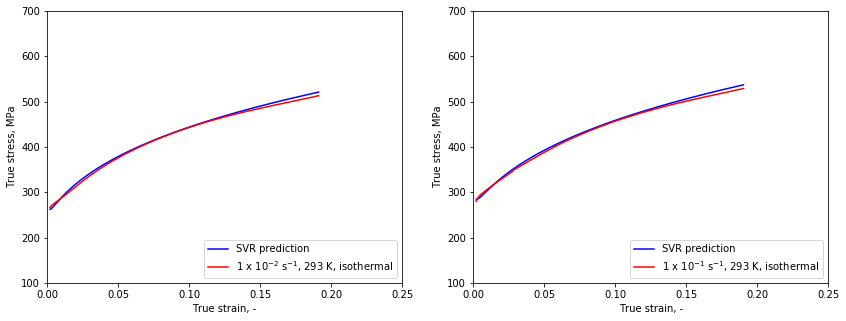

In [28]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], svr_test_pred['e2_iso'], label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], svr_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], svr_test_pred['e1_iso'], label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], svr_test_pred['e1_iso']))


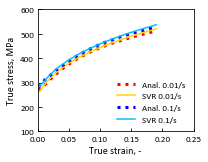

In [33]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='Anal. 0.01/s', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e2_iso['Strain'][windows:], svr_test_pred['e2_iso'], label='SVR 0.01/s', color='gold')
C,=plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='Anal. 0.1/s', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e1_iso['Strain'][windows:], svr_test_pred['e1_iso'], label='SVR 0.1/s', color='deepskyblue')

legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('test_svr.png',dpi=1200)

## ANN

In [34]:
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

C:\Users\zhang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
def ANNmodel(hid_layers=[], in_dim=1, out_dim=1):
    model = Sequential()
    if len(hid_layers) == 0:
        model.add(Dense(out_dim, input_dim=in_dim, activation='relu', kernel_initializer='normal'))
    else:
        model.add(Dense(hid_layers[0], input_dim=in_dim, activation='relu', kernel_initializer='normal'))
        for layer in hid_layers:
            model.add(Dense(layer, activation='relu'))
        model.add(Dense(out_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_hid_layers(min_layers=0, max_layers=5, min_neurons=1, max_neurons=10, n_iter=1):
    hid_layers = []
    for _ in range(n_iter):
        layers = np.random.randint(min_layers, max_layers)
        hid_layers.append(np.random.randint(low=min_neurons, high=max_neurons, size=layers).tolist())
    return hid_layers

In [36]:
#train
runANN = False
np.random.seed(99)
n_iter = 20
param_dist = {'hid_layers': get_hid_layers(max_layers=10, min_neurons=1, max_neurons=20, n_iter=n_iter)}

if runANN:
    ann = KerasRegressor(build_fn=ANNmodel, in_dim=X_train.shape[1], epochs=50, batch_size=256, verbose=0)
    random_search_ann = GridSearchCV(estimator=ann, param_grid=param_dist, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_ann.fit(X_train, y_train)
    elapsed_ann = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_ann, n_iter))
    report(random_search_ann.cv_results_)

In [37]:
# test
if runANN:
    best_ann = random_search_ann.best_estimator_
else:
    best_ann_param =  {'hid_layers': [16, 10, 4, 19, 6]} 
    best_ann = KerasRegressor(build_fn=ANNmodel, in_dim=X_train.shape[1], epochs=50, batch_size=256, verbose=0, **best_ann_param)
start = time.time()
best_ann.fit(X_train, y_train)
elapsed_ann_test = (time.time() - start)
print('r2_score for training set:', r2_score(y_train, best_ann.predict(X_train)))
print("ANN took %.2f seconds for test." % (elapsed_ann_test))
ann_test_pred = {}
for key, X in X_test.items():
    ann_test_pred[key] = manual_descaling(best_ann.predict(X), stress_range)

r2_score for training set: 0.9980331360991673
ANN took 7.81 seconds for test.


r2_score for e2_iso: 0.9981423627303947
r2_score for e1_iso: 0.9987487323190857


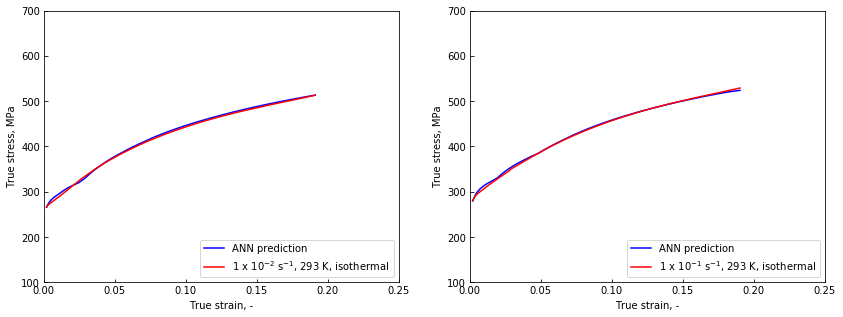

In [38]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], ann_test_pred['e2_iso'], label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], ann_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], ann_test_pred['e1_iso'], label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], ann_test_pred['e1_iso']))


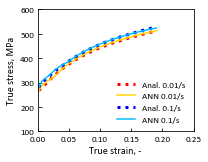

In [39]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='Anal. 0.01/s', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e2_iso['Strain'][windows:], ann_test_pred['e2_iso'], label='ANN 0.01/s', color='gold')
C,=plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='Anal. 0.1/s', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e1_iso['Strain'][windows:], ann_test_pred['e1_iso'], label='ANN 0.1/s', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('test_ann.png',dpi=1200)

## Vanilla LSTM

In [35]:
from keras.layers import LSTM

In [36]:
def vLSTMmodel(input_shape, nNeurons=1, out_dim=1):
    model = Sequential()
    model.add(LSTM(nNeurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(out_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [37]:
#train
runLSTM = False
np.random.seed(157)
n_iter = 100
param_dist = {'nNeurons': range(1, 200, 1)}
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
if runLSTM:
    vlstm = KerasRegressor(build_fn=vLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=50,  verbose=0)
    random_search_vlstm = RandomizedSearchCV(estimator=vlstm, param_distributions=param_dist, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_vlstm.fit(X_train_lstm, y_train)
    elapsed_lstm = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_lstm, n_iter))
    report(random_search_vlstm.cv_results_)

In [56]:
# test
if runLSTM:
    best_vlstm = random_search_vlstm.best_estimator_
else:
    best_vlstm_param =  {'nNeurons': 121}
    best_vlstm = KerasRegressor(build_fn=vLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=50,  verbose=0)
start = time.time()
best_vlstm.fit(X_train_lstm, y_train)
elapsed_vlstm_test = (time.time() - start)
print('r2_score for training set:', r2_score(y_train, best_vlstm.predict(X_train_lstm)))
print("Vanilla LSTM took %.2f seconds for test." % (elapsed_vlstm_test))
vlstm_test_pred = {}
for key, X in X_test.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    vlstm_test_pred[key] = manual_descaling(best_vlstm.predict(X), stress_range)

r2_score for training set: 0.9745211796941123
Vanilla LSTM took 64.71 seconds for test.


r2_score for e2_iso: 0.9737567362246519
r2_score for e1_iso: 0.94494200335591


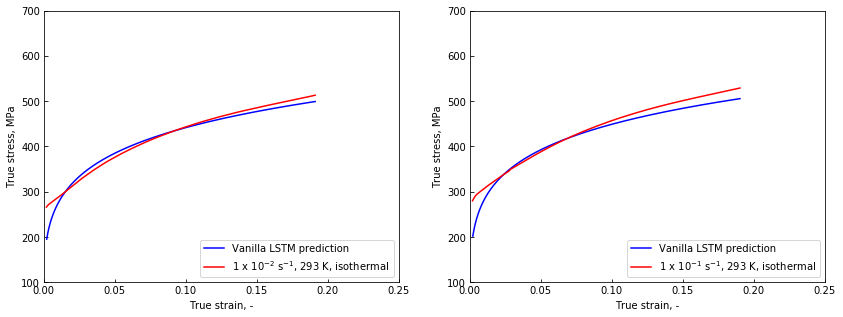

In [57]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], vlstm_test_pred['e2_iso'], label='Vanilla LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], vlstm_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], vlstm_test_pred['e1_iso'], label='Vanilla LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], vlstm_test_pred['e1_iso']))


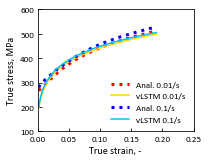

In [58]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='Anal. 0.01/s', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e2_iso['Strain'][windows:], vlstm_test_pred['e2_iso'], label='vLSTM 0.01/s', color='gold')
C,=plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='Anal. 0.1/s', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e1_iso['Strain'][windows:], vlstm_test_pred['e1_iso'], label='vLSTM 0.1/s', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('test_vlstm.png',dpi=1200)

## Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

In [41]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [42]:
def sLSTMmodel(input_shape, nNeurons_1=361, nNeurons_2=361, nNeurons_3=141, out_dim=1):
    model = Sequential()
    model.add(LSTM(nNeurons_1, input_shape=input_shape, activation='relu', return_sequences=True))
    # model.add(Dropout(0.5))
    model.add(LSTM(nNeurons_2, input_shape=input_shape, activation='relu', return_sequences=True))
    # model.add(Dropout(0.5))
    model.add(LSTM(nNeurons_3))
    # model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [43]:
# train
runLSTM = False
np.random.seed(157)
n_iter = 10
param_dist = {'batch_size': range(50, 500, 10),
              'epochs': range(10, 100, 10)}
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
input_shape=X_train_lstm.shape[1:]
if runLSTM:
    slstm = KerasRegressor(build_fn=sLSTMmodel, input_shape=X_train_lstm.shape[1:], verbose=0)
    random_search_slstm = RandomizedSearchCV(estimator=slstm, param_distributions=param_dist, n_iter=n_iter, scoring='r2')
    start = time.time()
    random_search_slstm.fit(X_train_lstm, y_train)
    elapsed_lstm = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_lstm, n_iter))
    report(random_search_slstm.cv_results_)

In [44]:
# train
runLSTM = False
np.random.seed(157)
n_iter = 10
param_dist = {'nNeurons_1': range(10, 200, 20),
              'nNeurons_2': range(10, 400, 40),
              'nNeurons_3': range(10, 400, 40)}
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
if runLSTM:
    slstm = KerasRegressor(build_fn=sLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=180, batch_size=170, verbose=0)
    random_search_slstm = RandomizedSearchCV(estimator=slstm, param_distributions=param_dist, scoring='r2')
    start = time.time()
    random_search_slstm.fit(X_train_lstm, y_train)
    elapsed_lstm = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_lstm, n_iter))
    report(random_search_slstm.cv_results_)

In [45]:
# test
if runLSTM:
    best_slstm = random_search_slstm.best_estimator_
else:
    best_slstm_param =  {'nNeurons_3': 361, 'nNeurons_2': 361, 'nNeurons_1': 141}
    best_slstm = KerasRegressor(build_fn=sLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=70, batch_size=100,  verbose=0)
start = time.time()
best_slstm.fit(X_train_lstm, y_train)
elapsed_slstm_test = (time.time() - start)
print('r2_score for training set:', r2_score(y_train, best_slstm.predict(X_train_lstm)))
print("Stack LSTM took %.2f seconds for test." % (elapsed_slstm_test))
slstm_test_pred = {}
for key, X in X_test.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    slstm_test_pred[key] = manual_descaling(best_slstm.predict(X), stress_range)

r2_score for training set: 0.9988880346880084
Stack LSTM took 1210.29 seconds for test.


r2_score for e2_iso: 0.9997025157005506
r2_score for e1_iso: 0.9998959347947263


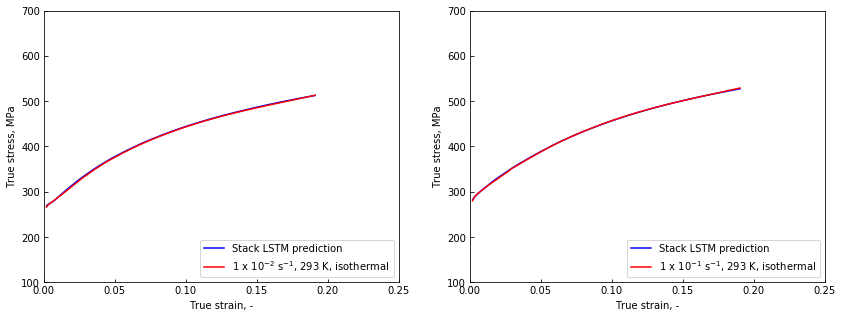

In [46]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], slstm_test_pred['e2_iso'], label='Stack LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], slstm_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], slstm_test_pred['e1_iso'], label='Stack LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], slstm_test_pred['e1_iso']))


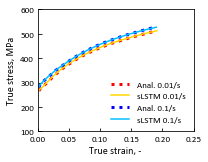

In [47]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='Anal. 0.01/s', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e2_iso['Strain'][windows:], slstm_test_pred['e2_iso'], label='sLSTM 0.01/s', color='gold')
C,=plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='Anal. 0.1/s', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e1_iso['Strain'][windows:], slstm_test_pred['e1_iso'], label='sLSTM 0.1/s', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('test_slstm.png',dpi=1200)

## Free form viz

C:\Users\zhang\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


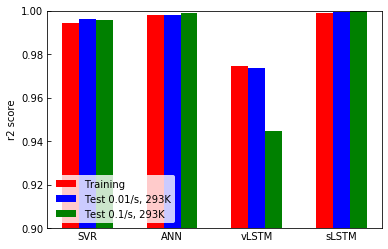

In [59]:
import matplotlib.ticker as ticker
name_list = ['SVR','ANN','vLSTM','sLSTM']
train_list = [r2_score(y_train, best_svr.predict(X_train)),
              r2_score(y_train, best_ann.predict(X_train)),
              r2_score(y_train, best_vlstm.predict(X_train_lstm)),
              r2_score(y_train, best_slstm.predict(X_train_lstm))]
test_list_e2 = [r2_score(df_e2_iso['Stress'][windows:], svr_test_pred['e2_iso']),
                r2_score(df_e2_iso['Stress'][windows:], ann_test_pred['e2_iso']),
                r2_score(df_e2_iso['Stress'][windows:], vlstm_test_pred['e2_iso']),
                r2_score(df_e2_iso['Stress'][windows:], slstm_test_pred['e2_iso'])]
test_list_e1 = [r2_score(df_e1_iso['Stress'][windows:], svr_test_pred['e1_iso']),
                r2_score(df_e1_iso['Stress'][windows:], ann_test_pred['e1_iso']),
                r2_score(df_e1_iso['Stress'][windows:], vlstm_test_pred['e1_iso']),
                r2_score(df_e1_iso['Stress'][windows:], slstm_test_pred['e1_iso'])]
x =list(range(len(train_list)))
total_width, n = 0.8, 4
width = total_width / n
 
plt.bar(x, train_list, width=width, label='Training', fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e2, width=width, label='Test 0.01/s, 293K', tick_label = name_list, fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e1, width=width, label='Test 0.1/s, 293K', fc = 'g')
plt.legend(loc='lower right')
plt.ylabel('r2 score')
plt.ylim(ymin=0.90,ymax=1.00) # x-axis range
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
legend = plt.legend(loc='lower left')
legend.get_frame().set_linewidth(0.0)
from pylab import *
tick_params(bottom='off')
plt.savefig('test_score.png',dpi=1200)

## Test with unknown data

There is the last flow curves that was hidden in the dataset. This flow curve is the isothermal flow curve at 1 x 10$^{-2}$ s$^{-1]$ and 373 K. It was just introduced from here. Therefore, the models will never see it.

### Prediction

### strain rate 0.01/s at 373K

r2_score for SVR: 0.7763632478276228
r2_score for ANN: 0.9968364130962593
r2_score for vLSTM: 0.8669223071858603
r2_score for sLSTM: 0.9986751364994261


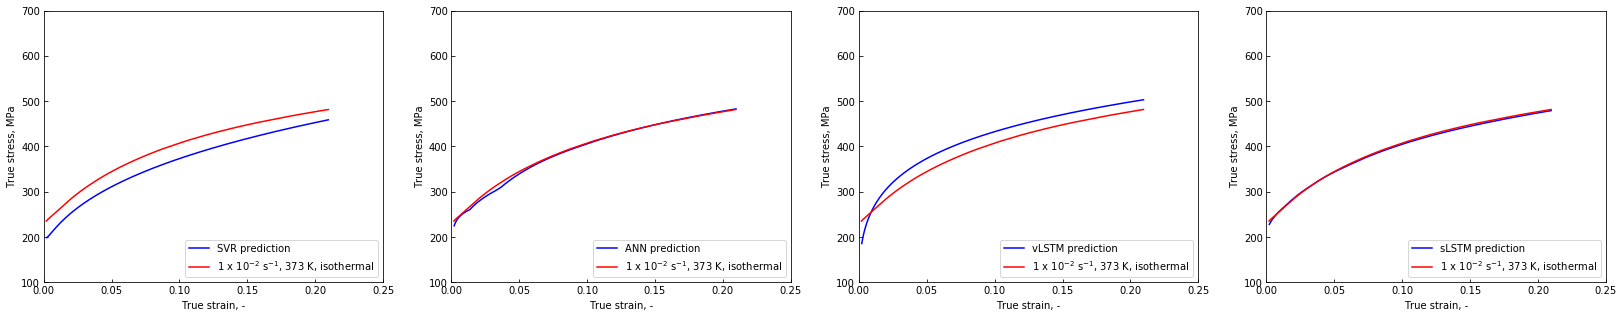

In [60]:
X_e2_373K_iso = X_test['e2_373K_iso']
X_e2_373K_iso_lstm = np.reshape(X_e2_373K_iso, (X_e2_373K_iso.shape[0], 1, X_e2_373K_iso.shape[1]))

svr_unknown_pred_373 = manual_descaling(best_svr.predict(X_e2_373K_iso), stress_range)
ann_unknown_pred_373 = manual_descaling(best_ann.predict(X_e2_373K_iso), stress_range)
vlstm_unknown_pred_373 = manual_descaling(best_vlstm.predict(X_e2_373K_iso_lstm), stress_range)
slstm_unknown_pred_373 = manual_descaling(best_slstm.predict(X_e2_373K_iso_lstm), stress_range)

# plot results
plt.figure(figsize=(28,5))
plt.subplot(1,4,1)
plt.plot(df_e2_373K_iso['Strain'][windows:], svr_unknown_pred_373, label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for SVR:', r2_score(df_e2_373K_iso['Stress'][windows:], svr_unknown_pred_373))


plt.subplot(1,4,2)
plt.plot(df_e2_373K_iso['Strain'][windows:], ann_unknown_pred_373, label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for ANN:', r2_score(df_e2_373K_iso['Stress'][windows:], ann_unknown_pred_373))

plt.subplot(1,4,3)
plt.plot(df_e2_373K_iso['Strain'][windows:], vlstm_unknown_pred_373, label='vLSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for vLSTM:', r2_score(df_e2_373K_iso['Stress'][windows:], vlstm_unknown_pred_373))

plt.subplot(1,4,4)
plt.plot(df_e2_373K_iso['Strain'][windows:], slstm_unknown_pred_373, label='sLSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for sLSTM:', r2_score(df_e2_373K_iso['Stress'][windows:], slstm_unknown_pred_373))

### strain rate 0.001/s at 293K

r2_score for SVR: 0.9962257020129601
r2_score for ANN: 0.9963068686412121
r2_score for vLSTM: 0.9719767437653188
r2_score for sLSTM: 0.9965145421678654


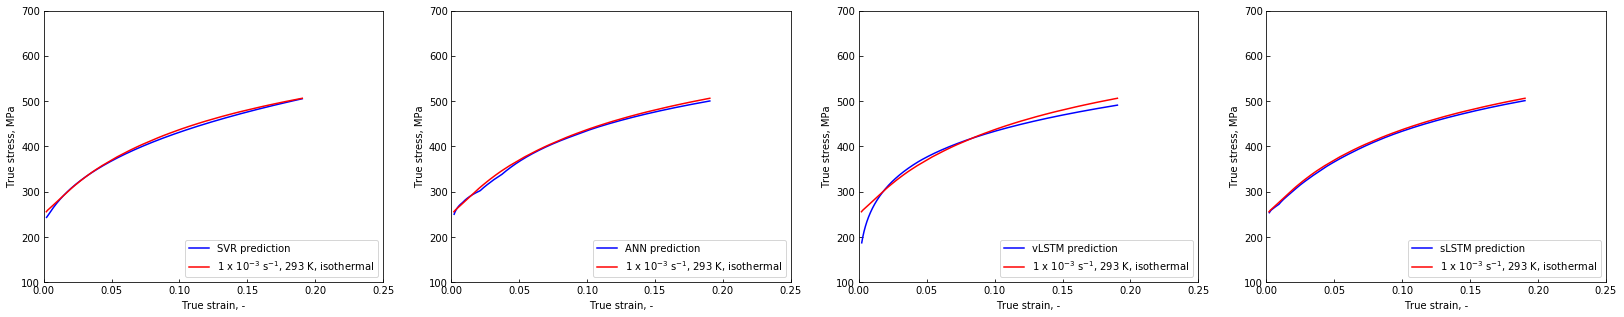

In [61]:
X_e3_iso = X_test['e3_iso']
X_e3_iso_lstm = np.reshape(X_e3_iso, (X_e3_iso.shape[0], 1, X_e3_iso.shape[1]))

svr_unknown_pred_293 = manual_descaling(best_svr.predict(X_e3_iso), stress_range)
ann_unknown_pred_293 = manual_descaling(best_ann.predict(X_e3_iso), stress_range)
vlstm_unknown_pred_293 = manual_descaling(best_vlstm.predict(X_e3_iso_lstm), stress_range)
slstm_unknown_pred_293 = manual_descaling(best_slstm.predict(X_e3_iso_lstm), stress_range)

# plot results
plt.figure(figsize=(28,5))
plt.subplot(1,4,1)
plt.plot(df_e3_iso['Strain'][windows:], svr_unknown_pred_293, label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for SVR:', r2_score(df_e3_iso['Stress'][windows:], svr_unknown_pred_293))


plt.subplot(1,4,2)
plt.plot(df_e3_iso['Strain'][windows:], ann_unknown_pred_293, label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for ANN:', r2_score(df_e3_iso['Stress'][windows:], ann_unknown_pred_293))

plt.subplot(1,4,3)
plt.plot(df_e3_iso['Strain'][windows:], vlstm_unknown_pred_293, label='vLSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for vLSTM:', r2_score(df_e3_iso['Stress'][windows:], vlstm_unknown_pred_293))

plt.subplot(1,4,4)
plt.plot(df_e3_iso['Strain'][windows:], slstm_unknown_pred_293, label='sLSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='1 x 10$^{-3}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for sLSTM:', r2_score(df_e3_iso['Stress'][windows:], slstm_unknown_pred_293))

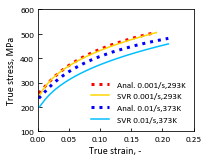

In [62]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='Anal. 0.001/s,293K', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e3_iso['Strain'][windows:], svr_unknown_pred_293, label='SVR 0.001/s,293K', color='gold')
C,=plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='Anal. 0.01/s,373K', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e2_373K_iso['Strain'][windows:], svr_unknown_pred_373, label='SVR 0.01/s,373K', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('pred_svr.png',dpi=1200)

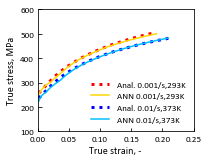

In [63]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='Anal. 0.001/s,293K', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e3_iso['Strain'][windows:], ann_unknown_pred_293, label='ANN 0.001/s,293K', color='gold')
C,=plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='Anal. 0.01/s,373K', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e2_373K_iso['Strain'][windows:], ann_unknown_pred_373, label='ANN 0.01/s,373K', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('pred_ann.png',dpi=1200)

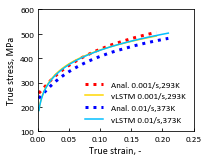

In [64]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='Anal. 0.001/s,293K', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e3_iso['Strain'][windows:], vlstm_unknown_pred_293, label='vLSTM 0.001/s,293K', color='gold')
C,=plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='Anal. 0.01/s,373K', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e2_373K_iso['Strain'][windows:], vlstm_unknown_pred_373, label='vLSTM 0.01/s,373K', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('pred_vlstm.png',dpi=1200)

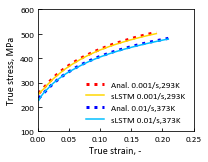

In [65]:
%matplotlib inline
# ax = plt.gca()
font1 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 10,
}
font2 = {'family' : 'Calibri',
'weight' : 'normal',
'size'   : 9,
}
figsize = 3,2.36
figure, ax = plt.subplots(figsize=figsize)

A,=plt.plot(df_e3_iso['Strain'], df_e3_iso['Stress'], label='Anal. 0.001/s,293K', color='red', linestyle=':',linewidth=3.0)
B,=plt.plot(df_e3_iso['Strain'][windows:], slstm_unknown_pred_293, label='sLSTM 0.001/s,293K', color='gold')
C,=plt.plot(df_e2_373K_iso['Strain'], df_e2_373K_iso['Stress'], label='Anal. 0.01/s,373K', color='blue', linestyle=':',linewidth=3.0)
D,=plt.plot(df_e2_373K_iso['Strain'][windows:], slstm_unknown_pred_373, label='sLSTM 0.01/s,373K', color='deepskyblue')


legend = plt.legend(handles=[A,B,C,D],prop=font2, loc=4)
legend.get_frame().set_linewidth(0.0) # delete outline of legend
legend.get_frame().set_facecolor('none')

plt.tick_params(labelsize=9)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Calibri') for label in labels]

plt.xlabel('True strain, -',font1)    #Name x label
plt.ylabel('True stress, MPa',font1)    #Name y label
# plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range

#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=600) # y-axis range
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['xtick.direction'] = 'in' 

plt.tight_layout()
plt.savefig('pred_slstm.png',dpi=1200)

C:\Users\zhang\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


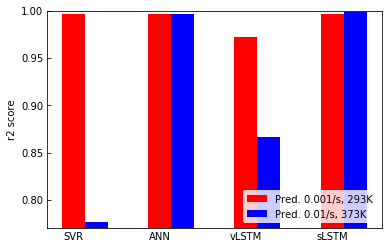

In [66]:
import matplotlib.ticker as ticker
name_list = ['SVR','ANN','vLSTM','sLSTM']

pred_list_293 = [r2_score(df_e3_iso['Stress'][windows:], svr_unknown_pred_293),
                r2_score(df_e3_iso['Stress'][windows:], ann_unknown_pred_293),
                r2_score(df_e3_iso['Stress'][windows:], vlstm_unknown_pred_293),
                r2_score(df_e3_iso['Stress'][windows:], slstm_unknown_pred_293)]
pred_list_373 = [r2_score(df_e2_373K_iso['Stress'][windows:], svr_unknown_pred_373),
                r2_score(df_e2_373K_iso['Stress'][windows:], ann_unknown_pred_373),
                r2_score(df_e2_373K_iso['Stress'][windows:], vlstm_unknown_pred_373),
                r2_score(df_e2_373K_iso['Stress'][windows:], slstm_unknown_pred_373)]
x =list(range(len(train_list)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, pred_list_293, width=width, label='Pred. 0.001/s, 293K', tick_label = name_list, fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, pred_list_373, width=width, label='Pred. 0.01/s, 373K', fc = 'b')

plt.legend(loc='lower right')
plt.ylabel('r2 score')
plt.ylim(ymin=0.77,ymax=1.00) # x-axis range
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
legend = plt.legend(loc='lower right')
legend.get_frame().set_linewidth(0.0)
from pylab import *
tick_params(bottom='off')
plt.savefig('pred_score.png',dpi=1200)